In [9]:
import numpy as np
import scipy

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.time import Time
from datetime import datetime, timezone
from astroplan import Observer, FixedTarget
from astroplan.plots import plot_airmass, plot_sky

import matplotlib.pyplot as plt
#%matplotlib widget

In [10]:
#time = Time('2025-04-01 23:59:00.000', format='iso')
#time = Time('2025-04-29 23:59:00.000', format='iso')
time = Time('2025-05-20 23:59:00.000', format='iso')
#time = Time(datetime.now(timezone.utc))
observer = Observer.at_site("LSST")

#ra = 53.125
#dec = -28.1
#name = 'ECDFS'

#ra = 59.1004
#dec = -48.73
#name = 'EDFS_comcam'

#ra = 106.23
##dec = -10.51
##name = 'seagull'

#ra = 37.86
#dec = 6.98
#name = 'Rubin_SV_38_7'

#ra = 6.022329
#dec = -72.081444
#name = '47_Tuc'

#ra = 95.0
#dec = -25.0
#name = 'Rubin_SV_095_-25'

#ra = 98.25
#dec = -21.75
#name = 'Rubin_SV_98_-22'

#ra = 95.3621919
#dec = -64.9941960
#name = 'NGC 2230'

#ra = 81.0420
#dec = -63.0314
#name = 'LMC Outskirts'

#ra = 85.0
#dec = 10.0
#name='Ecliptic_85_10'

#ra = 40.0
#dec = 10.0
#name='Ecliptic_40_10'

#ra = 39.9971
#dec = -34.4492
#name = 'Fornax'

#ra = 150.1
#dec = 2.18194444
#name='COSMOS'

#ra = 180.00
#dec = 0.00
#ra = 196.00
#dec = -8.00
#ra = 210.00
#dec = -10.00
#ra = 225.00
#dec = -15.00
#name = 'Deep Ecliptic'

#ra = 216.
#dec = -15.
#name = 'Deep Ecliptic 1'

ra = 245.
dec = -22.
name = 'Deep Ecliptic 2'

coord = SkyCoord(ra=ra, dec=dec, unit='deg', frame='icrs')

In [11]:
time_midnight = observer.midnight(time, which='nearest')
time_sunset = observer.sun_set_time(time_midnight, which='previous')
time_sunrise = observer.sun_rise_time(time_midnight, which='next')

if observer.moon_altaz(time_midnight).alt.value > 0.:
    time_moonrise = observer.moon_rise_time(time_midnight, which='previous')
    time_moonset = observer.moon_set_time(time_midnight, which='next')
else:
    time_moonrise = observer.moon_rise_time(time_midnight, which='next')
    time_moonset = observer.moon_set_time(time_midnight, which='previous')

print('Time (UTC) =', time)
print('Time Evening Civil Twilight (UTC) =', observer.twilight_evening_civil(time_midnight, which='previous').iso)
print('Time Evening Nautical Twilight (UTC) =', observer.twilight_evening_nautical(time_midnight, which='previous').iso)
print('Time Evening Astronomical Twilight (UTC) =', observer.twilight_evening_astronomical(time_midnight, which='previous').iso)
print('Time Midnight (UTC) =', time_midnight.iso)
print('Time Morning Astronomical Twilight (UTC) =', observer.twilight_morning_astronomical(time_midnight, which='next').iso)
print('Time Morning Nautical Twilight (UTC) =', observer.twilight_morning_nautical(time_midnight, which='previous').iso)
print('Time Morning Civil Twilight (UTC) =', observer.twilight_morning_civil(time_midnight, which='previous').iso)
print('Target = %s'%(name))
print('(RA, Dec) = (%.2f, %2f)'%(ra, dec))
print('RA (decimal hours) = %.4f'%(coord.icrs.ra.hour))
print('Target Az (deg) =', observer.altaz(time, coord).az.deg)
print('Target Alt (deg) =', observer.altaz(time, coord).alt.deg)
print('Target Transit (UTC) =', observer.target_meridian_transit_time(time_midnight, coord, which='nearest').iso)
print('Moon Illumination =', observer.moon_illumination(time))
print('Moonrise time (UTC) =', time_moonrise.iso)
print('Moonset time (UTC) =', time_moonset.iso)
print('Lunar Separation (deg) =', observer.moon_altaz(time).separation(observer.altaz(time, coord)).deg)

Time (UTC) = 2025-05-20 23:59:00.000
Time Evening Civil Twilight (UTC) = 2025-05-20 22:19:56.988
Time Evening Nautical Twilight (UTC) = 2025-05-20 22:49:11.470
Time Evening Astronomical Twilight (UTC) = 2025-05-20 23:17:56.356
Time Midnight (UTC) = 2025-05-21 04:39:35.904
Time Morning Astronomical Twilight (UTC) = 2025-05-21 10:01:24.070
Time Morning Nautical Twilight (UTC) = 2025-05-20 10:29:39.089
Time Morning Civil Twilight (UTC) = 2025-05-20 10:58:53.573
Target = Deep Ecliptic 2
(RA, Dec) = (245.00, -22.000000)
RA (decimal hours) = 16.3333
Target Az (deg) = 103.86918602632909
Target Alt (deg) = 21.258968094003116
Target Transit (UTC) = 2025-05-21 05:08:07.915
Moon Illumination = 0.44646334961146095
Moonrise time (UTC) = 2025-05-21 05:15:38.925
Moonset time (UTC) = 2025-05-20 17:35:04.630
Lunar Separation (deg) = 89.54617625091804


In [12]:
# Moon time now
#time = Time(datetime.now(timezone.utc))
#observer.moon_altaz(time)

In [13]:
time_array = time_sunset + np.arange(0., (time_sunrise - time_sunset).to(u.hr).value, 0.1) * u.hr

alt_array = observer.altaz(time_array, coord).alt.deg
az_array = observer.altaz(time_array, coord).az.deg

print('%30s%15s%15s'%('Time (UTC)', 'Alt (deg)', 'Az (deg)'))
for ii in range(0, len(time_array)):
    print('%30s%15.2f%15.2f'%(time_array[ii].iso, alt_array[ii], az_array[ii]))

                    Time (UTC)      Alt (deg)       Az (deg)
       2025-05-20 21:50:03.123          -4.72         118.97
       2025-05-20 21:56:03.123          -3.58         118.17
       2025-05-20 22:02:03.123          -2.43         117.38
       2025-05-20 22:08:03.123          -1.27         116.60
       2025-05-20 22:14:03.123          -0.10         115.84
       2025-05-20 22:20:03.123           1.07         115.09
       2025-05-20 22:26:03.123           2.25         114.34
       2025-05-20 22:32:03.123           3.44         113.61
       2025-05-20 22:38:03.123           4.63         112.89
       2025-05-20 22:44:03.123           5.83         112.18
       2025-05-20 22:50:03.123           7.04         111.48
       2025-05-20 22:56:03.123           8.25         110.78
       2025-05-20 23:02:03.123           9.47         110.09
       2025-05-20 23:08:03.123          10.69         109.42
       2025-05-20 23:14:03.123          11.92         108.74
       2025-05-20 23:20:

In [14]:
def printTime(time):
    return ':'.join(time.iso.split()[1].split(':')[0:2])

azimuth_exclusion = ((observer.twilight_morning_astronomical(time_midnight, which='next') - time_array).to(u.hour) < (2. * u.hour)) \
    & ~((az_array > 220.) & (az_array < 360.))

criteria = (alt_array > 40.) \
    & (alt_array < 83.) \
    & (observer.sun_altaz(time_array).alt.value < -18.) \
    & ~azimuth_exclusion

observable_time_ranges = []
labels, n_labels = scipy.ndimage.label(criteria)
for label in range(0, n_labels):
    selection = np.where(labels == (label + 1))[0]

    time_start = time_array[np.min(selection)]
    time_end = time_array[np.max(selection)]
    
    print('%s - %s'%(
        time_start.iso,
        time_end.iso
    ))

    observable_time_ranges.append('%s -- %s'%(
        printTime(time_start),
        printTime(time_end),
    ))

print(observable_time_ranges)

2025-05-21 01:32:03.123 - 2025-05-21 08:44:03.123
['01:32 -- 08:44']


/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.0.0/lib/python3.12/site-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


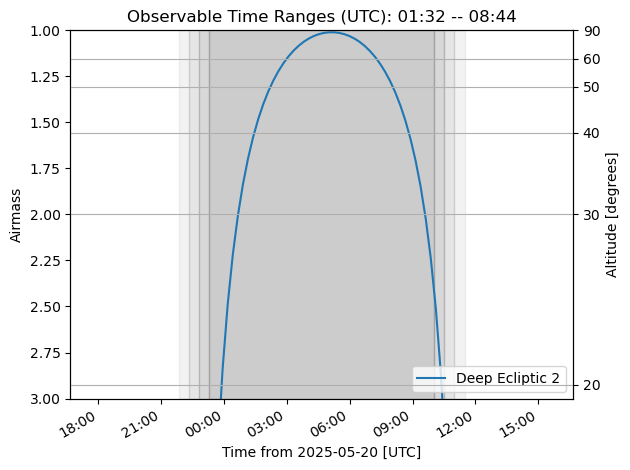

In [15]:
target = FixedTarget(coord, name=name)

plt.figure()
plt.clf()
ax = plot_airmass(target, observer, time_midnight, brightness_shading=True, altitude_yaxis=True)
plt.title('Observable Time Ranges (UTC): %s'%(' & '.join(observable_time_ranges)))
ax.legend(loc='lower right')
#ax.legend(loc='lower right', title='01:01 -- 02:43')
plt.grid(axis='both')
#plt.ylim(30., 90.)
plt.tight_layout()
plt.show()

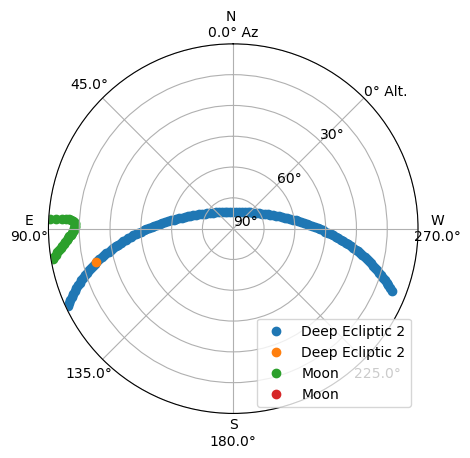

In [16]:
target_moon = FixedTarget(observer.moon_altaz(time_moonrise), name='Moon')

plt.clf()
plot_sky(target, observer, time_array)
plot_sky(target, observer, time)
plot_sky(target_moon, observer, time_array)
plot_sky(target_moon, observer, time)
plt.legend(loc='lower right')
#bbox_to_anchor=(1.25, 0.5))
plt.show()